<a href="https://colab.research.google.com/github/thanhthuy280501/Data-Visualization/blob/main/Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')
#Reading the file path and then show the table
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WorldCupMatches.csv')
df.head()



**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

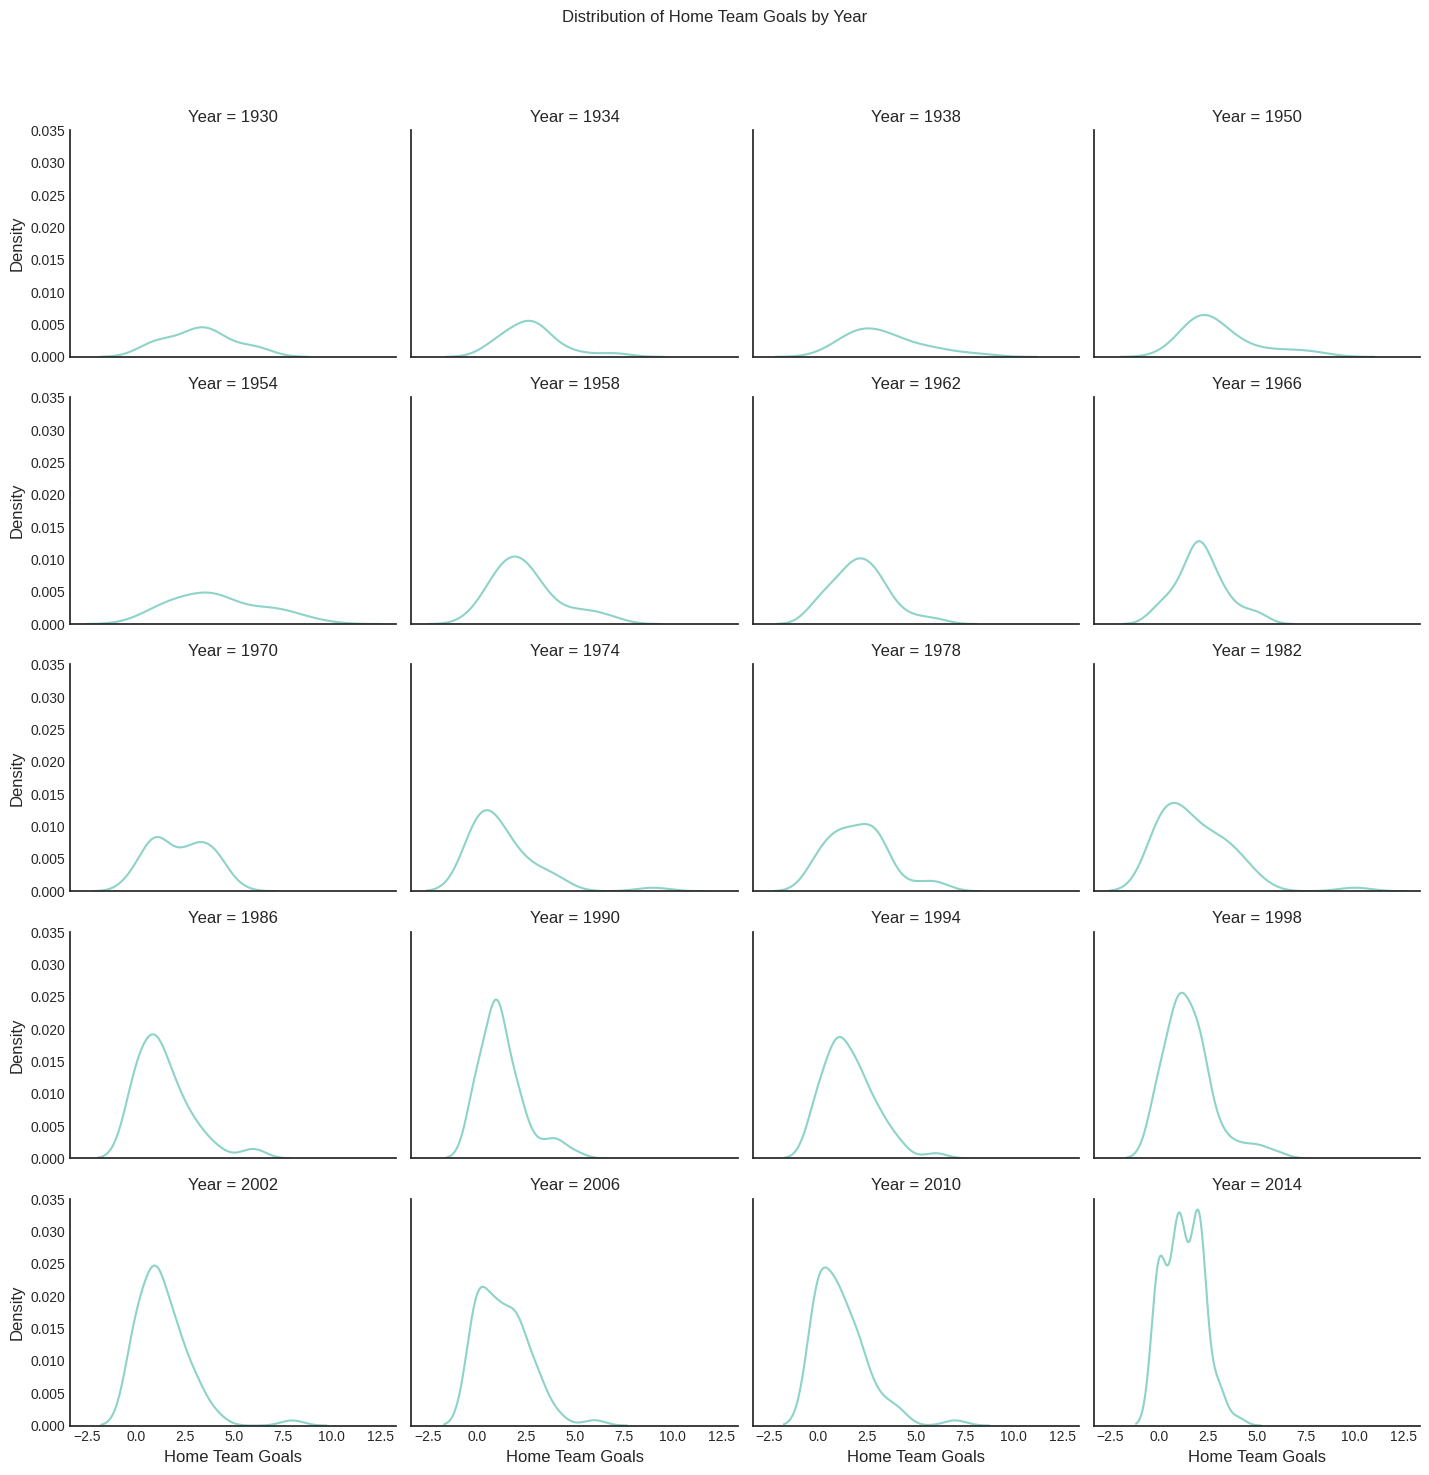

In [44]:
# Ensure Year is treated as an integer for better labeling
df['Year'] = df['Year'].astype(int)

# Using displot to draw density curves (kind='kde') faceted by Year
g = sns.displot(data=df, x='Home Team Goals', col='Year', kind='kde', col_wrap=4, height=3, aspect=1.2)

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Home Team Goals by Year')
plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

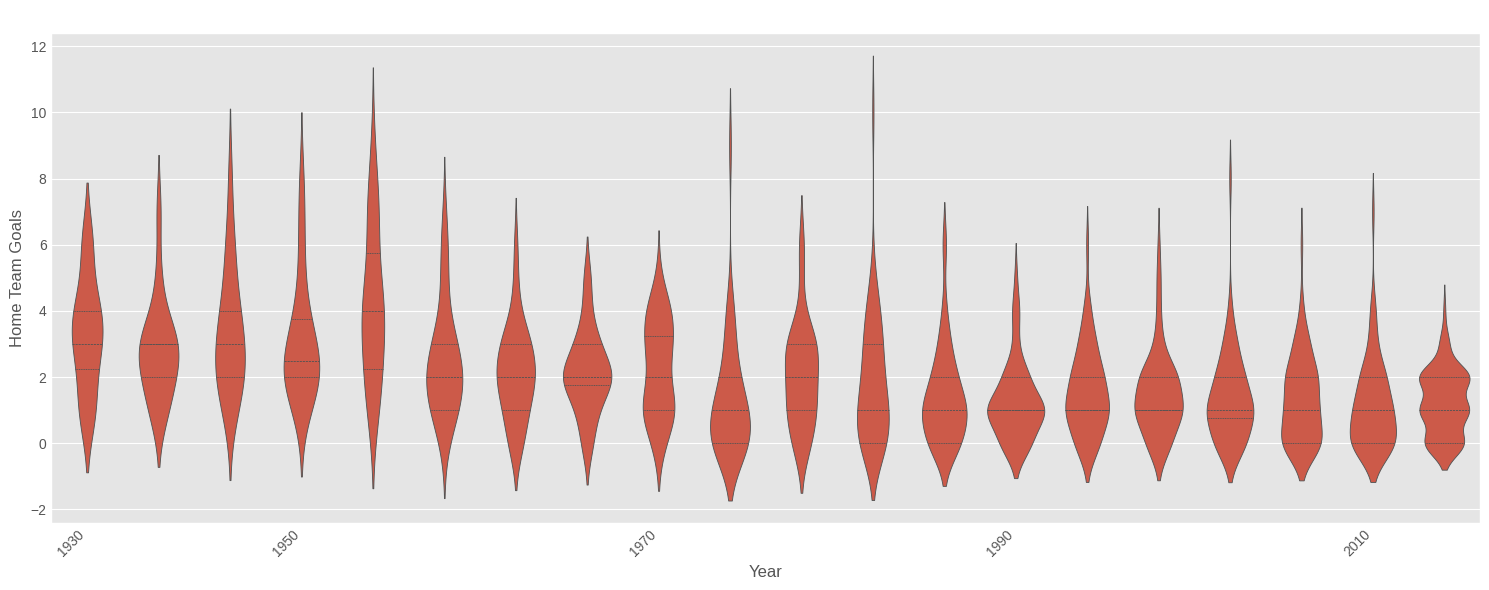

In [51]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='Year', y='Home Team Goals', inner='quartile')

# Get current axes
ax = plt.gca()

# Get unique years from the sorted data to match the x-axis order
years = sorted(df['Year'].unique())

# Create labele only show years ending with 0, otherwise empty string
labels = [str(year) if year % 10 == 0 else '' for year in years]

# Set the labels on the x-axis
ax.set_xticks(range(len(years)))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.title('Distribution of Home Team Goals by Year (Violin Plot)')
plt.xlabel('Year')
plt.ylabel('Home Team Goals')
plt.tight_layout()
plt.show()

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [25]:
!pip install joypy

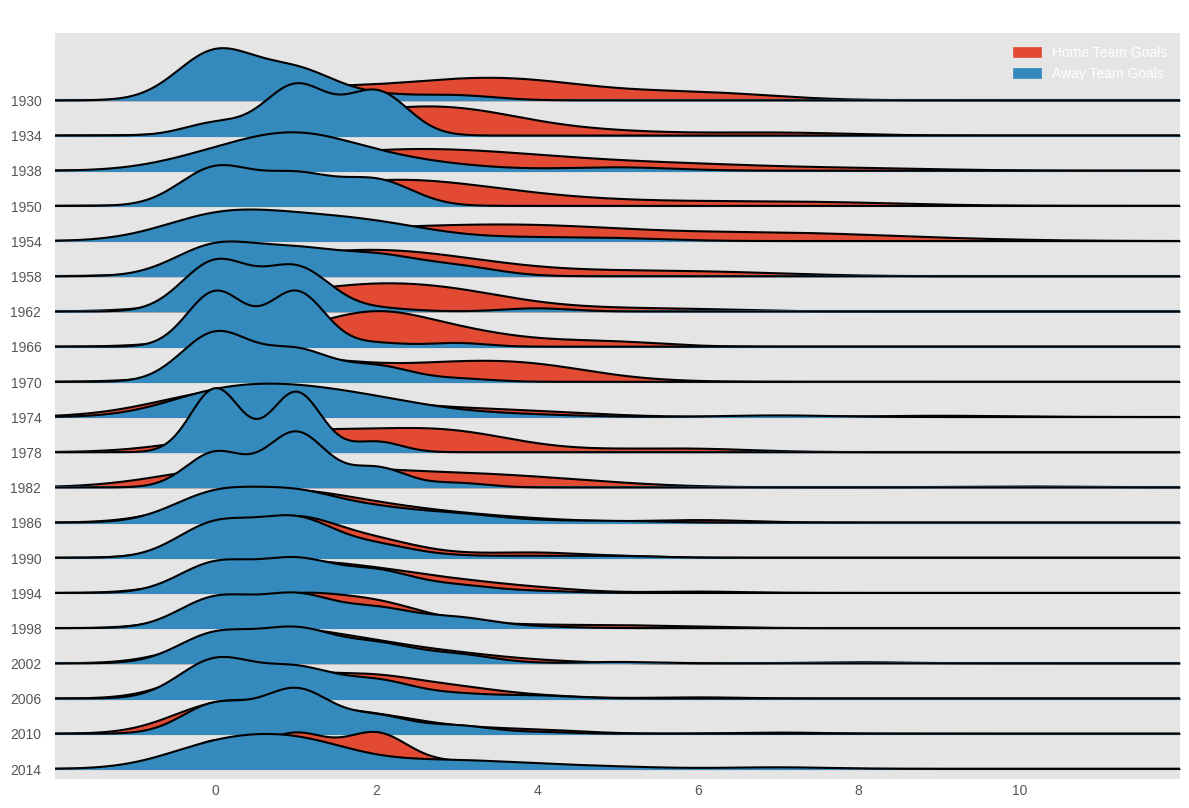

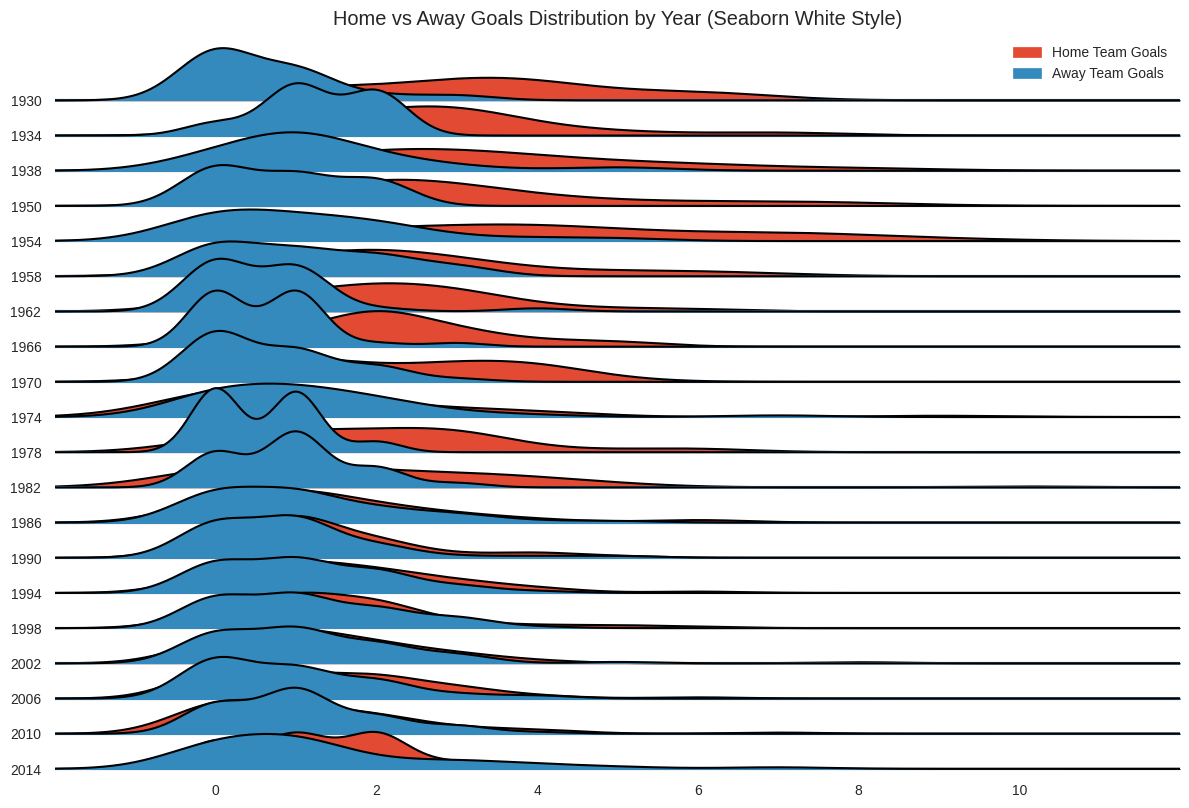

In [52]:
import joypy as jp
import matplotlib.pyplot as plt

# Visualize with current style
fig, axes = jp.joyplot(df, column=['Home Team Goals', 'Away Team Goals'], by='Year', legend=True, figsize=(12, 8))
plt.title('Home vs Away Goals Distribution by Year (Initial Style)')
plt.show()

# Switch to seaborn-white for the second run
plt.style.use('seaborn-v0_8-white')
fig, axes = jp.joyplot(df, column=['Home Team Goals', 'Away Team Goals'], by='Year', legend=True, figsize=(12, 8))
plt.title('Home vs Away Goals Distribution by Year (Seaborn White Style)')
plt.show()

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



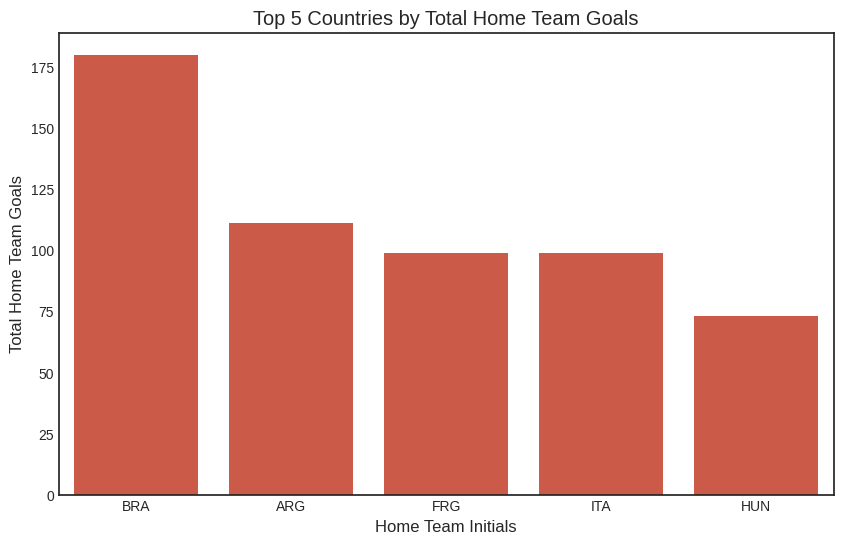

In [53]:
home_goals_by_initial = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
top_5_countries = home_goals_by_initial.sort_values(by='Home Team Goals', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Home Team Initials', y='Home Team Goals', data=top_5_countries)
plt.title('Top 5 Countries by Total Home Team Goals')
plt.xlabel('Home Team Initials')
plt.ylabel('Total Home Team Goals')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



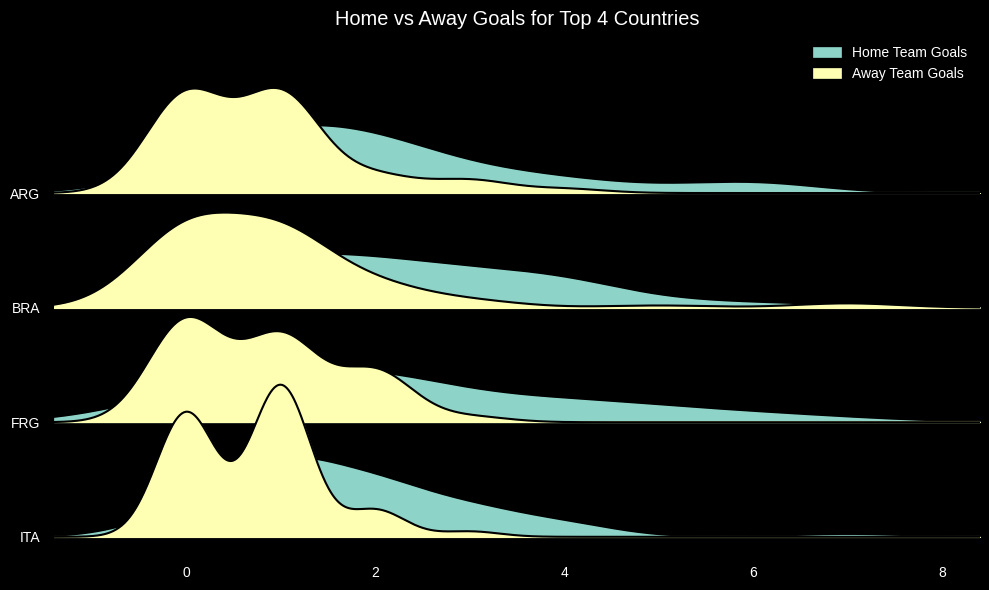

In [54]:
import matplotlib.pyplot as plt
import joypy as jp

# Get top 4 countries from previous step
top_4_initials = home_goals_by_initial.sort_values(by='Home Team Goals', ascending=False).head(4)['Home Team Initials'].tolist()

# Filter the dataframe for these countries
df_top4 = df[df['Home Team Initials'].isin(top_4_initials)]

# Set style to dark_background
plt.style.use('dark_background')

# Create joyplotand use the Home Team Initials for the y-axis labels (by parameter)
fig, axes = jp.joyplot(df_top4,
                       column=['Home Team Goals', 'Away Team Goals'],
                       by='Home Team Initials',
                       legend=True,
                       figsize=(10, 6),
                       title="Home vs Away Goals for Top 4 Countries")

plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [55]:
!pip install seaborn_qqplot

In [56]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.


<Figure size 800x800 with 0 Axes>

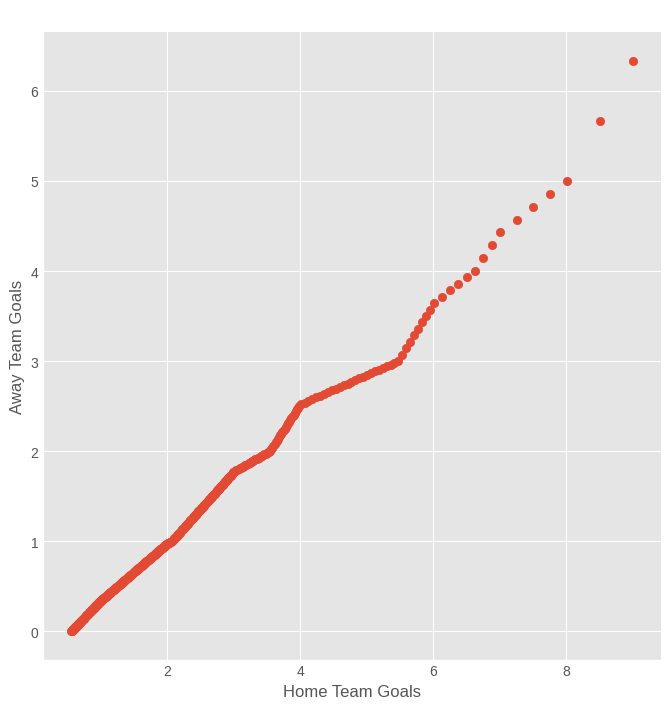

In [60]:
import matplotlib.pyplot as plt
from seaborn_qqplot import pplot
import seaborn as sns

# Set the style to ggplot as requested in previous setup
plt.style.use('ggplot')

# Draw the QQ plot to compare Home Team Goals and Away Team Goals
# the 'df' dataframe already loaded in the kernel
plt.figure(figsize=(8, 8))
pplot(df, x="Home Team Goals", y="Away Team Goals", kind='qq', height=7, aspect=1)
plt.title('QQ Plot: Home Team Goals vs Away Team Goals')
plt.show()

**Analysis of Q7:**

Based on the QQ plot generated:
 - If the points fall approximately on a straight diagonal line y=x, it suggests
that the distributions of Home Team Goals and Away Team Goals are similar.
- Deviations from the line indicates differences in skewness or kurtosis.
- in World Cup data, Home Teams tend to have a higher scoring distribution, which might be reflected as a shift in the plot.

